# DMBI-Assignment 2: Classification using Decision trees

### Group No : 12

##### Abdul Azeez MS21W001
##### Gokul P MS21W018
##### Mohammed Zabi ms21w027 
##### Senthilkumar MS21W037

Assignment 2: Classification using Decision trees

Problem statement:

Build decision tree classifiers as given in the tables below. Evaluate their prediction and validation as required.

Dataset

The Cars Evaluation data set consists of 7 attributes, 6 as feature attributes and 1 as the target attribute (car_evaluation). All the attributes are categorical. 
1	buying	vhigh, high, med, low
2	maintenance	vhigh, high, med,low
3	doors	2, 3, 4, 5 , more
4	persons	2, 4, more
5	lug_boot	small, med, big
6	safety	low, med, high
7	car_evaluation 	 unacc, acc, good, vgood

#### Q3 For the given data set build a decision tree using CART and evaluate classifier performance

## CART

In [1]:
#IMPORT PYTHON MODULES

from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
#This module needs to be separately invoked from tree library
from sklearn.model_selection import train_test_split,StratifiedKFold
#Stratified K-fold is a variation of KFold that returns stratified folds. The folds are made by preserving the percentage of samples for each class.
from sklearn.metrics import confusion_matrix
#from sklearn.tree import export_graphviz
import pandas as pd
import numpy as np
#While pandas adopts many coding idioms from NumPy, the biggest difference is that pandas is designed for working with tabular or heterogeneous data. NumPy, by contrast,is best suited for working with homogeneous numerical array data.
import graphviz
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification #for bootstrapping
from sklearn.model_selection import KFold
#import category_encoders as ce

import numpy as np
import copy as cp
import matplotlib.pyplot as plt

import seaborn as sns
from typing import Tuple
from sklearn.metrics import confusion_matrix

In [2]:
#READ AND EXPLORE DATA
#Use pandas read_csv function to upload Bikebuyer data from the computer folder (Mac) to IPython. For other OS, please refer to Chapter 6 of Wes McKinney’s book on Python for Data Analysis
#Alternatively upload data file to jupyter homepage and use pd.read_csv("Bikebuyer.csv") 
dtf=pd.read_csv("car_data.csv")

In [3]:
dtf['buying'],_ = pd.factorize(dtf['buying'])
dtf['maintenance'],_ = pd.factorize(dtf['maintenance'])
dtf['doors'],_ = pd.factorize(dtf['doors'])
dtf['persons'],_ = pd.factorize(dtf['persons'])
dtf['lug_boot'],_ = pd.factorize(dtf['lug_boot'])
dtf['safety'],_ = pd.factorize(dtf['safety'])
dtf

,buying,maintenance,doors,persons,lug_boot,safety,car_evaluation
0,0,0,0,0,0,0,unacc
1,0,0,0,0,0,1,unacc
2,0,0,0,0,0,2,unacc
3,0,0,0,0,1,0,unacc
4,0,0,0,0,1,1,unacc
...,...,...,...,...,...,...,...
1723,3,3,3,2,1,1,good
1724,3,3,3,2,1,2,vgood
1725,3,3,3,2,2,0,unacc
1726,3,3,3,2,2,1,good


In [4]:
#Extract relevant features from data
X=dtf[['buying','maintenance','doors','persons','lug_boot','safety']]
#'MaritalStatus' not included as scikit learn CART algorithm doesnt support categorical variables' houseownerflag gives number of houses owned
#type(X)
#np.shape(X) # dimension of dataframe
#X.dtypes
X.head()

,buying,maintenance,doors,persons,lug_boot,safety
0,0,0,0,0,0,0
1,0,0,0,0,0,1
2,0,0,0,0,0,2
3,0,0,0,0,1,0
4,0,0,0,0,1,1


In [5]:
#DATA PREPARATION
#scikit-learn uses an optimised version of the CART algorithm; however, scikit-learn implementation does not support categorical variables for now.
#Assign Bikebuyer as target variable y
y=dtf['car_evaluation']
#Split X into train and test data: https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=1)

In [6]:
#MODEL BUILDING
#Specify decision tree model as dt using scikit learn “DecisionTreeClassifier” module: https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html#sklearn.tree.DecisionTreeClassifier
dt=DecisionTreeClassifier(criterion='gini',
    min_samples_leaf=5 ,max_depth=10,
    ccp_alpha=0.0)
#Fit the model using fit() method
dt.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=10, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=5, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

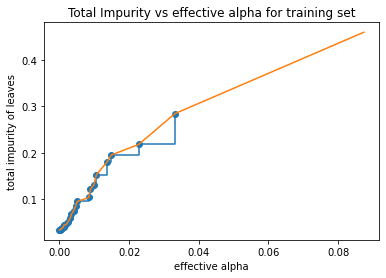

In [7]:
#TREE PRUNING USING CCP ALPHA
#Determining Cost Complexity Parameter (ccp_alpha) for post pruning the tree: https://scikit-learn.org/stable/auto_examples/tree/plot_cost_complexity_pruning.html#sphx-glr-auto-examples-tree-plot-cost-complexity-pruning-py
path = dt.cost_complexity_pruning_path(X_train, y_train)
ccp_alphas, impurities = path.ccp_alphas, path.impurities
#Using matplotlib.pyplot to plot the effect of varying ccp_alpha on error
fig, ax = plt.subplots()
ax.plot(ccp_alphas[:-1],impurities[:-1],marker='o', drawstyle="steps-post")
ax.set_xlabel("effective alpha")
ax.set_ylabel("total impurity of leaves")
ax.set_title("Total Impurity vs effective alpha for training set")
plt.plot(ccp_alphas, impurities)

dts = [] #tree building
for ccp_alpha in ccp_alphas:
    dt = DecisionTreeClassifier(random_state=0, ccp_alpha=ccp_alpha)
    dt.fit(X_train, y_train)
    dts.append(dt)

In [8]:
dts

[DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                        max_depth=None, max_features=None, max_leaf_nodes=None,
                        min_impurity_decrease=0.0, min_impurity_split=None,
                        min_samples_leaf=1, min_samples_split=2,
                        min_weight_fraction_leaf=0.0, presort='deprecated',
                        random_state=0, splitter='best'),
 DecisionTreeClassifier(ccp_alpha=0.00012004225487371664, class_weight=None,
                        criterion='gini', max_depth=None, max_features=None,
                        max_leaf_nodes=None, min_impurity_decrease=0.0,
                        min_impurity_split=None, min_samples_leaf=1,
                        min_samples_split=2, min_weight_fraction_leaf=0.0,
                        presort='deprecated', random_state=0, splitter='best'),
 DecisionTreeClassifier(ccp_alpha=0.00022224966045190832, class_weight=None,
                        criterion='gini', 

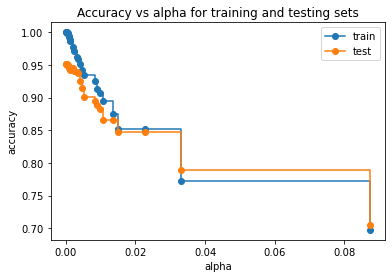

In [9]:
#EVALUATION OF ALPHA BASED ON TRAIN AND TEST ERRORS

#Evaluates prediction accuracy and plots it against ccp_alphas
train_scores = [dt.score(X_train, y_train) for dt in dts]
test_scores = [dt.score(X_test, y_test) for dt in dts]
fig, ax = plt.subplots()
ax.set_xlabel("alpha")
ax.set_ylabel("accuracy")
ax.set_title("Accuracy vs alpha for training and testing sets")
ax.plot(ccp_alphas, train_scores, marker='o', label="train",
        drawstyle="steps-post")
ax.plot(ccp_alphas, test_scores, marker='o', label="test",
        drawstyle="steps-post")
ax.legend()
plt.show()


In [10]:
#FINAL MODEL BUILDING
dt=DecisionTreeClassifier(criterion='gini',
    min_samples_leaf=5 ,max_depth=10,
    ccp_alpha=0.0025)
dt.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0025, class_weight=None, criterion='gini',
                       max_depth=10, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=5, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

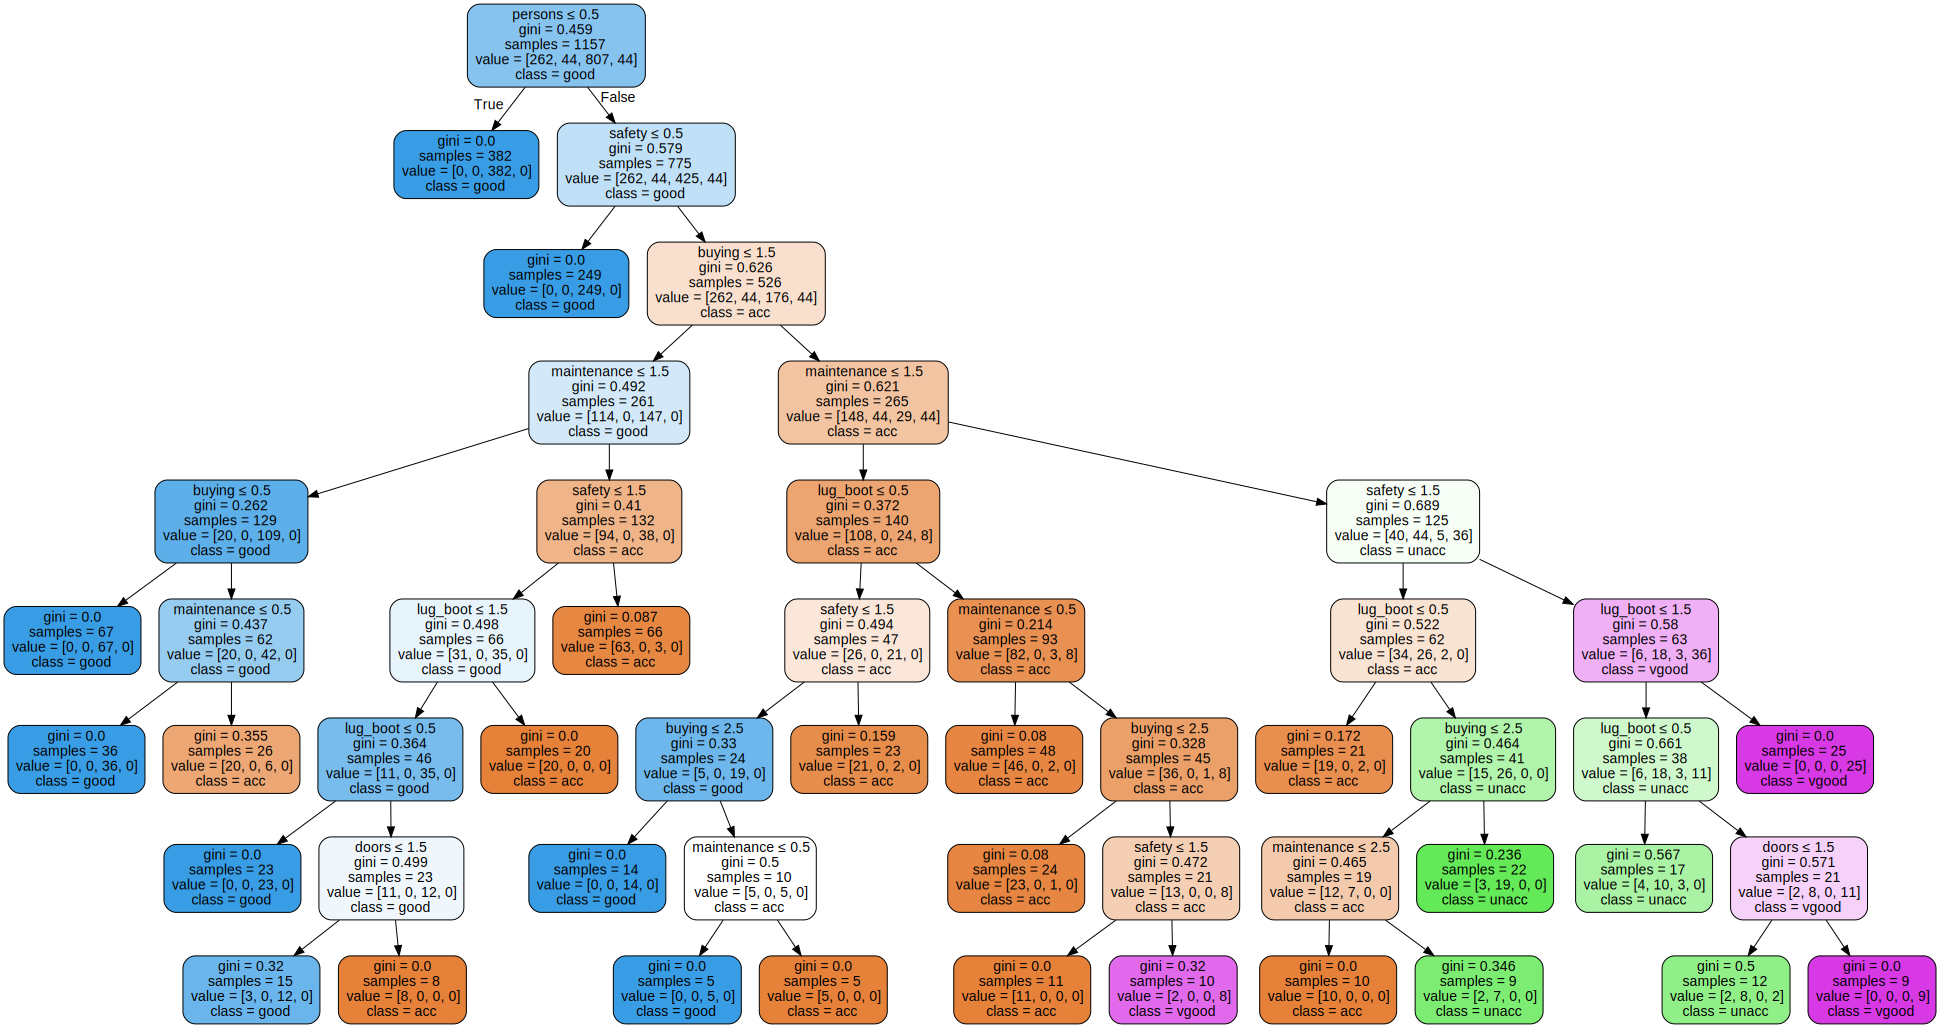

In [11]:
#VISUALIZING THE TREE USING GRAPHVIZ
dot_data = tree.export_graphviz(dt, out_file=None,feature_names=X_train.columns,class_names=['acc','unacc','good','vgood'],filled=True, rounded=True,special_characters=True) 
graph = graphviz.Source(dot_data)
graph
#Scikit learn CART algorithm treats ordinal data also as integers and performs division. Categorical data not advisable. 

In [12]:
#CROSS VALIDATION

#simple validation set approach: https://scikit-learn.org/stable/modules/model_evaluation.html#scoring-parameter  
#by default splits into five folds
from sklearn import model_selection
from sklearn.model_selection import cross_validate
from sklearn.metrics import recall_score
y_pred=dt.predict(X_test)

scores = cross_validate(dt, X_test, y_test)
#k=scores['test_score']
scores
matrixcv = confusion_matrix(y_test, y_pred, labels=["acc","unacc", "good","vgood"])

In [13]:

def ConfMat(ranCM):
    ranCM = pd.DataFrame(ranCM,columns=["acc","unacc", "good","vgood"], index=["acc","unacc", "good","vgood"])
    FP = ranCM.sum(axis=0) - np.diag(ranCM)  
    FN = ranCM.sum(axis=1) - np.diag(ranCM)
    TP = np.diag(ranCM)
    TN = ranCM.values.sum() - (FP + FN + TP)
    
    P = TP + FN
    N = FP + TN

    # Sensitivity, 
    TPR = TP/(TP+FN)
    # Specificity 
    TNR = TN/(TN+FP) 
    # Overall accuracy
    ACC = (TP+TN)/(TP+FP+FN+TN)
    # error
    ERR = (FP+FN)/(TP+FP+FN+TN)
    TP = pd.DataFrame(TP,index=["acc","unacc", "good","vgood"],columns = [4])
    Output =pd.concat({'FP':FP,'FN':FN,'TN':TN,'TP':TP,'P':P,'N':N,'TNR':TNR,'ACC':ACC,'TPR':TPR,'ERR':ERR}, axis=1)
    
    return print(Output)
ConfMat(matrixcv)

       FP  FN   TN   TP    P    N       TNR       ACC       TPR       ERR
        0   1    2    4    3    4         5         6         7         8
acc    18  10  431  112  122  449  0.959911  0.950963  0.918033  0.049037
unacc   1  19  167  384  403  168  0.994048  0.964974  0.952854  0.035026
good   11   0  535   25   25  546  0.979853  0.980736  1.000000  0.019264
vgood   1   2  549   19   21  550  0.998182  0.994746  0.904762  0.005254


In [14]:
kfold = KFold(n_splits=5, random_state=10, shuffle=True)
X = X.to_numpy()
y = y.to_numpy()

no_classes = len(np.unique(y))

actual = np.empty([0], dtype=int)
predicted = np.empty([0], dtype=int)

for train_ndx, test_ndx in kfold.split(X,y):

    train_X, train_y, test_X, test_y = X[train_ndx], y[train_ndx], X[test_ndx], y[test_ndx]

    actual = np.append(actual, test_y)

    #dt.fit(train_X, train_y)
    predicted = np.append(predicted, dt.predict(test_X))

[[ 358    4   19    3]
 [  34 1172    4    0]
 [   0    0   69    0]
 [   0    0    4   61]]


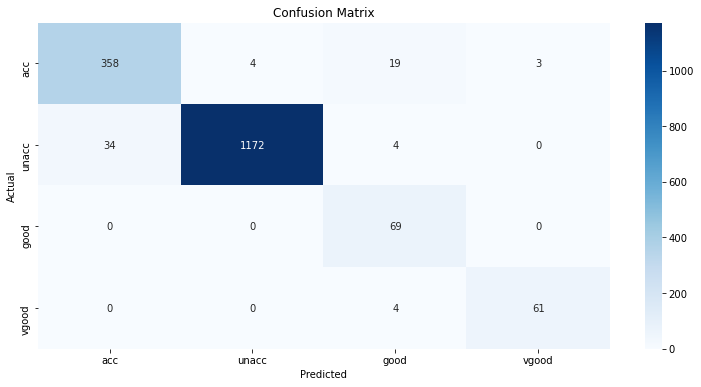

In [15]:
#def plot_confusion_matrix(actual_classes : np.array, predicted_classes : np.array, sorted_labels : list):

matrix = confusion_matrix(actual, predicted, labels=["acc","unacc", "good","vgood"])

plt.figure(figsize=(12.8,6))
sns.heatmap(matrix, annot=True, xticklabels=["acc","unacc", "good","vgood"], yticklabels=["acc","unacc", "good","vgood"], cmap="Blues", fmt="g")
plt.xlabel('Predicted'); plt.ylabel('Actual'); plt.title('Confusion Matrix')
print(matrix)
plt.show()

In [16]:
# a function to generate TP FN TN FP from the confusion matrix

def ConfMat(ranCM):
    ranCM = pd.DataFrame(ranCM,columns=["acc","unacc", "good","vgood"], index=["acc","unacc", "good","vgood"])
    FP = ranCM.sum(axis=0) - np.diag(ranCM)  
    FN = ranCM.sum(axis=1) - np.diag(ranCM)
    TP = np.diag(ranCM)
    TN = ranCM.values.sum() - (FP + FN + TP)
    
    P = TP + FN
    N = FP + TN

    # Sensitivity, 
    TPR = TP/(TP+FN)
    # Specificity 
    TNR = TN/(TN+FP) 
    # Overall accuracy
    ACC = (TP+TN)/(TP+FP+FN+TN)
    # error
    ERR = (FP+FN)/(TP+FP+FN+TN)
    TP = pd.DataFrame(TP,index=["acc","unacc", "good","vgood"],columns = [4])
    Output =pd.concat({'FP':FP,'FN':FN,'TN':TN,'TP':TP,'P':P,'N':N,'TNR':TNR,'ACC':ACC,'TPR':TPR,'ERR':ERR}, axis=1)
    
    return print(Output)
ConfMat(matrix)

       FP  FN    TN    TP     P     N       TNR       ACC       TPR       ERR
        0   1     2     4     3     4         5         6         7         8
acc    34  26  1310   358   384  1344  0.974702  0.965278  0.932292  0.034722
unacc   4  38   514  1172  1210   518  0.992278  0.975694  0.968595  0.024306
good   27   0  1632    69    69  1659  0.983725  0.984375  1.000000  0.015625
vgood   3   4  1660    61    65  1663  0.998196  0.995949  0.938462  0.004051
